__The metal-vacuum boundary is assumed to have a sinusoidal profile:__

$$ s(x) = h \sin(k_g x) $$

__The input field could be written in the form:__

$$ E_i = \begin{bmatrix}
           k_1 \\
           0 \\
           -k_x \\
         \end{bmatrix} e^{i(k_x x + k_1 z)}
\quad H_i = \begin{bmatrix}
           0 \\
           1 \\
           0 \\
         \end{bmatrix} e^{i(k_x x + k_1 z)}$$

 __where__ $$ k_{x}^2 + k_{1}^2 = k_0^2 $$

__Reflected field:__

$$ E_r = \sum_k \begin{bmatrix}
           -p \\
           0 \\
           -k \\
         \end{bmatrix} r(k) e^{i(k x - p z)}
\quad 
H_r = \sum_k \begin{bmatrix}
           0 \\
           1 \\
           0 \\
         \end{bmatrix} r(k) e^{i(k x - p z)}$$

__Transmitted field:__

$$ E_t = \frac{1}{\varepsilon} \sum_k \begin{bmatrix}
           q \\
           0 \\
           -k \\
         \end{bmatrix} t(k) e^{i(k x + q z)}
\quad 
H_r = \sum_k \begin{bmatrix}
           0 \\
           1 \\
           0 \\
         \end{bmatrix} t(k) e^{i(k x + q z)}$$

__where__ $$ k^2 + p^2 = k_0^2 \quad k^2 + q^2 = \varepsilon k_0^2 $$

__Boundary conditions could be written as__ $$ N \times \delta E = 0  \quad N \times \delta H = 0 $$

$$ N = \nabla (h \sin(k_g x) - z) =  \begin{bmatrix}
           h k_g \cos(k_g x) \\
           0 \\
           -1 \\
         \end{bmatrix} $$

__Boundary conditions for E yields__

$$ (h k_g k_x \cos(k_g x) - k_1) e^{i(k_x x + k_1 s(x))} = \frac{1}{\epsilon} \sum_k t(k) (h k_g k \cos(k_g x) - q) e^{i(kx + qs(x))} - \sum_k r(k) (p + h k_g k \cos(k_g x)) e^{i(k x - p s(x))}$$

__Recall Bessel-Fourier (Hankel transformation) expansion:__

$$ e^{ia \sin(u)} = \sum_{n = -\infty}^{n = +\infty} J_n(a) e^{i n u} $$

__it yields__

$$ (h k_g k_x \cos(k_g x) - k_1) e^{i k_x x} \sum_{m = -\infty}^{\infty} J_m(k_1 h) e^{i m k_g x} = $$ $$ = \frac{1}{\varepsilon} \sum_k \sum_{n = -\infty}^{n = \infty} t(k) (h k_g k_x \cos(k_g x) - q) J_n(qh) e^{i(k + n k_g) x} - \sum_k \sum_{n = -\infty}^{\infty} r(k) (p + h k_g k \cos(k_g x)) $$

__The last equation gives nonzero for a discrete set of k values that satisfy__

$$ k = k_l = k_x + l k_g $$

__Thus the last equation could be written in the form__

$$ A = B - C $$

__where__

$$ A = (h k_g k_x \cos(k_g x) - k_1) \sum_m J_m(k_1 h) e^{i m k_g x} $$

$$ B = \frac{1}{\varepsilon} \sum_{l, n} t(k_l)[h k_g k_l \cos(k_g x) - q_l] J_n(q_l h) e^{i(l+n)k_g x} $$

$$ C = \sum_{l,n} r(k_l) [p_l + h k_g k_l \cos(k_g x)] (-1)^n J_n(p_l h) e^{i (l+n) k_g x} $$

__by using identity__ $$ \cos(k_g x) = \frac{e^{i k_g x} + e^{-i k_g x}}{2} $$

__and recursive relation for Bessel functions:__

$$ \frac{J_{m+1} + J_{m-1}}{2} = \frac{m}{u} J_m(u)  $$

__we get__

$$ A = \sum_m \frac{m k_g k_x - k_1^2}{k_1} J_m(k_1 h) e^{i m k_g x} $$

$$ B = \frac{1}{\varepsilon} \sum_{l, n} t(k_l) \frac{n k_g k_l - q_l^2}{q_l} J_n(q_l h) e^{i m k_g x} $$

$$ C = -\sum_{l, n} r(k_l) $$

In [1]:
from xmlrpc.client import _datetime_type
import matplotlib.pyplot as plt
import numpy as np
import cmath
from ipywidgets import interactive
import seaborn as sb
from scipy.special import jv
%matplotlib inline

In [2]:
# constants in mkm
h = 0.053

Period = 1.52

k_g = 2*np.pi/Period

angle = 0

wavelength = 0.63

k_0 = 2*np.pi/wavelength

k_1 = np.cos(angle * np.pi/180)*k_0

k_x = np.sin(angle * np.pi/180)*k_0

epsilon = -8.28 + 1.516j

N = 6

In [3]:
def right_hand_side_E(N = N, k_1 = k_1, k_g = k_g, h = h):
    b = np.zeros(2*N+1)
    
    for m in range(-N, N + 1):
        b[m + N] = (m * k_1 * k_g - k_1**2) / k_1 * jv(m, k_1*h)
    
    return b

In [4]:
def right_hand_side_H(N = N, k_1 = k_1, h = h):
    b = np.zeros(2*N+1)
    
    for m in range(-N, N + 1):
        b[m + N] = jv(m, k_1*h)
    
    return b

In [5]:
def A_E_t(N = N, k_0 = k_0, k_g = k_g, k_x = k_x, e = epsilon, h = h):
    A = np.zeros((2*N + 1, 2*N + 1), dtype = np.complex128)
    
    for L in range(-N, N + 1):
        
        k_L = k_x + L*k_g
                
        q_L = (np.complex(e * k_0 ** 2 - k_L ** 2))  ** (1/2)
        
        for m in range(-N, N + 1):
            
            A[m, L] = ((m - L) * k_g * k_L - q_L**2)  / (e * q_L) * jv(m-L,q_L*h)
    
    return A

In [6]:
def A_E_r(N = N, k_0 = k_0, k_g = k_g, k_x = k_x, h = h):
    A = np.zeros((2*N + 1, 2*N + 1), dtype = np.complex128)
    
    for L in range(-N, N + 1):
        
        k_L = k_x + L * k_g
                
        p_L = (np.complex(k_0 ** 2 - k_L ** 2))  ** (1/2)
        
        for m in range(-N, N + 1):
            
            A[m, L] = ((m - L) * k_g * k_L - p_L**2)  / p_L * jv(m-L,p_L*h) * (-1)**(m-L)
    
    return A

In [7]:
def A_H_t(N = N, k_0 = k_0, k_x = k_x, k_g = k_g, h = h, e = epsilon):
    A = np.zeros((2*N + 1, 2*N + 1), dtype = np.complex128)
    
    for L in range(-N, N + 1):
        
        k_L = k_x + L * k_g
        
        q_L = (np.complex(e * k_0 ** 2 - k_L ** 2))  ** (1/2)
        
        for m in range(-N, N + 1):
            
            A[m, L] = jv(m-L,q_L*h)
    
    return A

In [8]:
def A_H_r(N = N, k_0 = k_0, k_x = k_x, k_g = k_g, h = h):
    A = np.zeros((2*N + 1, 2*N + 1), dtype = np.complex128)
    
    for L in range(-N, N + 1):
        
        k_L = k_x + L * k_g
        
        p_L = (np.complex(k_0 ** 2 - k_L ** 2))  ** (1/2)
        
        for m in range(-N, N + 1):
            
            A[m, L] = -jv(m-L,p_L*h)*(-1)**(m-L)
    
    return A

In [9]:
def find_r_t(N = N, k_0 = k_0, k_x = k_x, k_g = k_g, h = h, e = epsilon, k_1 = k_1):
    b_E = right_hand_side_E(N, k_1, k_g, h)
    b_H = right_hand_side_H(N, k_1, h)
    
    b = np.append(b_E, b_H)
    
    A_11 = A_E_t(N, k_0, k_g, k_x, e, h)
    A_12 = A_E_r(N, k_0, k_g, k_x, h)
    A_21 = A_H_t(N, k_0, k_x, k_g, h, e)
    A_22 = A_H_r(N, k_0, k_x, k_g, h)
    
    A_up = np.c_[A_11, A_12]
    A_down = np.c_[A_21, A_22]
    A = np.r_[A_up, A_down]
    
    t_r = np.linalg.solve(A,b)
    
    t = t_r[:2*N+1]
    
    r = t_r[2*N+1:]
    
    return r, t

Wall time: 136 ms


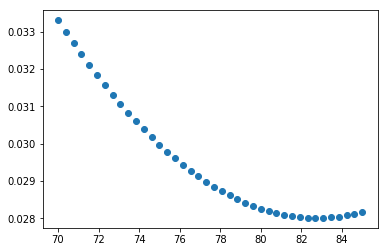

In [41]:
%%time

N = 6

pts = np.linspace(-N, N, 2*N + 1)
#r = find_r_t()[0]
#R = []
#for i in range(0, 2*N + 1):
#    R.append(abs(r[i])**2)
Theta_list = np.linspace(70,85,40)
R = []

for angle in Theta_list:
    k_01 = 2*np.pi/wavelength
    k_11 = np.cos(angle * np.pi/180)*k_0
    k_x1 = np.sin(angle * np.pi/180)*k_0
    r = find_r_t(N, k_0 = k_01, k_1 = k_11, k_x = k_x1)[0][N]
    
    R.append(abs(r)**2)
#T = [exact_solution(x) for x in pts]
plt.plot(Theta_list, R, 'o')
#plt.plot(pts, u,'o')

In [11]:
np.sum(R)

3.1533486706421456

Wall time: 107 ms


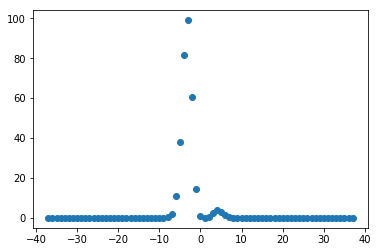

In [12]:
%%time

N = 37

pts = np.linspace(-N, N, 2*N + 1)
#r = find_r_t()[0]
#R = []
#for i in range(0, 2*N + 1):
#    R.append(abs(r[i])**2)

T = [abs(r)**2 for r in find_r_t(N)[1]]
#T = [exact_solution(x) for x in pts]
plt.plot(pts, T, 'o')
#plt.plot(pts, u,'o')

In [13]:
np.sum(R), np.sum(T)

(3.1533486706421456, 319.7076848905696)